# 일몰 ~ 일출까지는 학습 데이터에서 빼도 큰 무리가 없지 않을까
#### 근데 연속된 자료라면 바람, 풍향 등 빼면 안 좋을 거 같기도 하고...
#### 요인 분석에서 중요한 것은 일조량 관련 요인이라 했으니까 테스트 삼아 제외해 본다.
#### 송도는 무려 12시간, 50%의 자료를 줄일 수 있따.

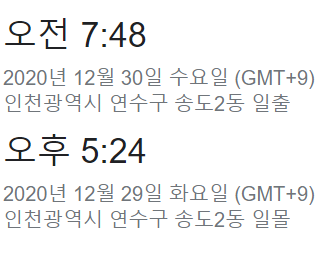

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
!pip install import_ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=1d3423b26bc95859b870237af5f2ac1efac54a5e0b6b25971cdb2101cb8378dc
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_data = pd.read_csv('/content/drive/MyDrive/Jupyter/unlimited_power/raw_data/train/train.csv')

In [5]:
raw_data

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [13]:
dataset = raw_data.set_index(raw_data['Hour'])
dataset.sort_index()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
Hour,,,,,,,,,
0,0,0,0,0,0,1.5,69.08,-12,0.0
0,877,0,30,0,0,1.5,87.86,3,0.0
0,877,0,0,0,0,1.4,87.87,3,0.0
0,202,0,0,0,0,1.6,91.04,13,0.0
0,202,0,30,0,0,1.6,97.29,12,0.0
...,...,...,...,...,...,...,...,...,...
23,781,23,0,0,0,5.9,68.14,5,0.0
23,68,23,30,0,0,2.0,69.58,-1,0.0
23,68,23,0,0,0,1.9,69.59,-1,0.0


In [15]:
dataset.sum(level=0)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
Hour,,,,,,,,,
0,1197930,0,32850,0,0,4733.8,156742.85,10722,0.000000
1,1197930,2190,32850,0,0,4818.6,157013.99,10019,0.000000
2,1197930,4380,32850,0,0,4768.4,157980.42,9379,0.000000
3,1197930,6570,32850,0,0,4685.8,158890.60,8806,0.000000
4,1197930,8760,32850,0,0,4673.9,158072.59,8559,0.000000
5,1197930,10950,32850,15528,124170,4969.1,152542.02,9785,2733.129251
6,1197930,13140,32850,61875,455759,5511.1,139289.52,13361,15385.644705
7,1197930,15330,32850,130229,848630,5862.2,120891.96,18780,38643.060840
8,1197930,17520,32850,210595,1230652,6261.0,102783.03,24517,70012.704533


In [ ]:
# 결론
# 대충 안정하게 생각하면 21시 부터 ~ 3시까지, 7시간을 빼도 괜찮을 것 같다(21,22,23,24,1,2,3)